<a href="https://colab.research.google.com/github/jmeugniot/bsan6070/blob/main/CA03/Decision_Tree_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Your name: Jamie Meugniot
## Assignment Name: CA03 - Decision Tree Algorithm


# Program Inititialization Section
## Enter your import packages here

In [ ]:
# import packages 
import os 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier #Import Decision Tree Classifier
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.preprocessing import LabelEncoder

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Data File Reading Section


In [ ]:
#read datasets
census_df = pd.read_csv("/content/drive/My Drive/MSBA_Colab_2020/ML_Algorithms/CA03/Data/census_data.csv")
census_df.head()

hours_per_week_bin occupation_bin  msr_bin  ...            age_bin   flag  y
0           b. 31-40   b. Mid - Low   b. Mid  ...   d. 36-40 & 56-60  train  0
1            a. 0-30        e. High  c. High  ...           e. 40-55  train  0
2           b. 31-40         a. Low   b. Mid  ...   d. 36-40 & 56-60  train  0
3           b. 31-40         a. Low  c. High  ...           e. 40-55  train  0
4           b. 31-40        e. High  c. High  ...  b. 26-30 & 71-100  train  0

[5 rows x 11 columns]

In [ ]:
#Read in table to be used for automation later
auto_df = pd.read_csv('Automation_Table.csv')
auto_df

Split   Min_Sample_Split  Min_ Sample_Leaf  ...  Recall  Precision  F1_Score
0  entropy                 2                 5  ...     NaN        NaN       NaN
1  entropy                 5                50  ...     NaN        NaN       NaN
2  entropy                 3               100  ...     NaN        NaN       NaN
3  entropy                 2               200  ...     NaN        NaN       NaN
4     gini                 2                 5  ...     NaN        NaN       NaN
5     gini                 5                50  ...     NaN        NaN       NaN
6     gini                 3               200  ...     NaN        NaN       NaN
7     gini                 2               200  ...     NaN        NaN       NaN

[8 rows x 8 columns]

# Initial Data Investigation Section

## 1. Data Quality Analysis 

Steps:
1. Statistical Description of data (data.describe)
2. Display number of total rows and columns of the dataset (data.shape)
3. Display number of non-null values for each column (data.count)
4. Display number of null values for each column (sum of data.isnull)
5. Display range, column, number of non-null objects of each column, datatype and memory usage (data.info)
6. Display Top 10 and Bottom 10 records (head and tail)

## 2. Exploratory Data Analysis

In [ ]:
#Descriptive Statistics
census_df.describe()

y
count  48842.000000
mean       0.239282
std        0.426649
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000

In [68]:
census_df.y.value_counts()

0    37155
1    11687
Name: y, dtype: int64

In [ ]:
#Total Rows & Columns
census_df.shape

(48842, 11)

In [ ]:
#Count of non-null values
census_df.count()

hours_per_week_bin    48842
occupation_bin        48842
msr_bin               48842
capital_gl_bin        48842
race_sex_bin          48842
education_num_bin     48842
education_bin         48842
workclass_bin         48842
age_bin               48842
flag                  48842
y                     48842
dtype: int64

In [ ]:
#Count of null values
census_df.isnull().sum()

hours_per_week_bin    0
occupation_bin        0
msr_bin               0
capital_gl_bin        0
race_sex_bin          0
education_num_bin     0
education_bin         0
workclass_bin         0
age_bin               0
flag                  0
y                     0
dtype: int64

In [ ]:
#Dataframe Info
census_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   hours_per_week_bin  48842 non-null  object
 1   occupation_bin      48842 non-null  object
 2   msr_bin             48842 non-null  object
 3   capital_gl_bin      48842 non-null  object
 4   race_sex_bin        48842 non-null  object
 5   education_num_bin   48842 non-null  object
 6   education_bin       48842 non-null  object
 7   workclass_bin       48842 non-null  object
 8   age_bin             48842 non-null  object
 9   flag                48842 non-null  object
 10  y                   48842 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 4.1+ MB


In [ ]:
#Top & Bottom Records
census_df.head()
census_df.tail()

hours_per_week_bin occupation_bin  msr_bin  ...           age_bin  flag  y
48837           b. 31-40        e. High   b. Mid  ...  d. 36-40 & 56-60  test  0
48838           b. 31-40   b. Mid - Low   a. Low  ...  c. 31-35 & 61-70  test  0
48839   d. 41-50 & 61-70        e. High  c. High  ...  d. 36-40 & 56-60  test  0
48840           b. 31-40   b. Mid - Low   a. Low  ...          e. 40-55  test  0
48841           e. 51-60        e. High  c. High  ...  c. 31-35 & 61-70  test  1

[5 rows x 11 columns]

##Exploratory Data Analysis
####Perform EDA of the income group with respect to the seven explanatory variables and display graphical representations as shown below. 

**7 Explanatory Variables:**

1. Age (5 bins)
2. Capital Gain/Loss (3 bins)
3. Education (5 bins)
4. Hours per Week (5 bins)
5. Marriage Status & Relationship (3 bins)
6. Occupation (5 bins)
7. Race & Sex (3 bins)


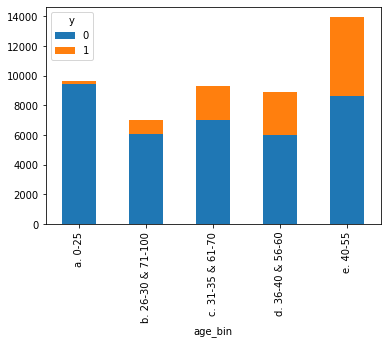

In [ ]:
#Age Bin Visualization
census_df.pivot_table(index= 'age_bin', columns='y',aggfunc='size').plot.bar(stacked=True)

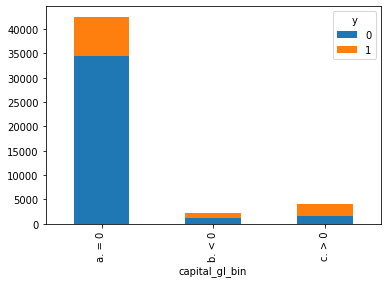

In [ ]:
#Capital Gain/Loss Bin Visualization
census_df.pivot_table(index= 'capital_gl_bin', columns='y',aggfunc='size').plot.bar(stacked=True)

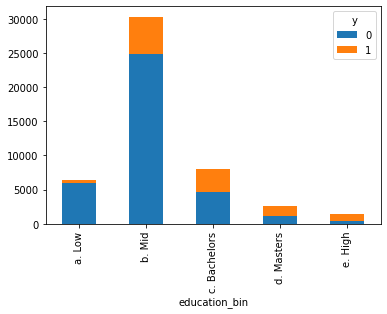

In [ ]:
#Education Bin Visualization
census_df.pivot_table(index= 'education_bin', columns='y',aggfunc='size').plot.bar(stacked=True)

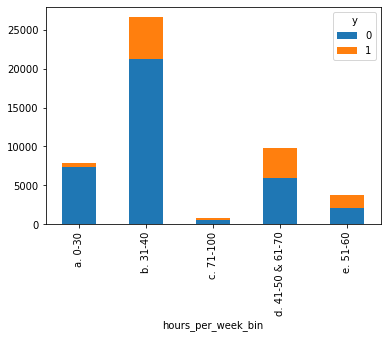

In [ ]:
#Hours per Week Bin Visualization
census_df.pivot_table(index= 'hours_per_week_bin', columns='y',aggfunc='size').plot.bar(stacked=True)

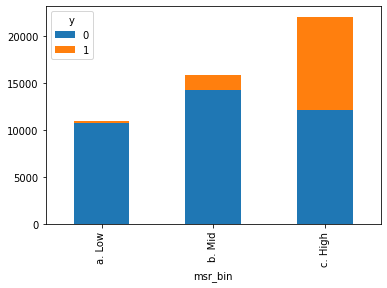

In [ ]:
#Marriage Status and Relationship Bin Visualization
census_df.pivot_table(index= 'msr_bin', columns='y',aggfunc='size').plot.bar(stacked=True)

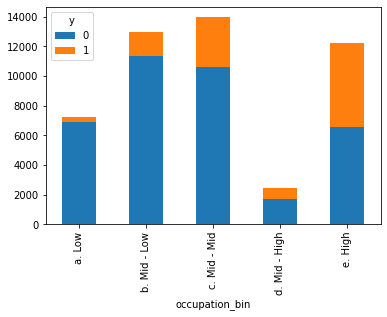

In [ ]:
# Occupation Bin Visualization
census_df.pivot_table(index= 'occupation_bin', columns='y',aggfunc='size').plot.bar(stacked=True)

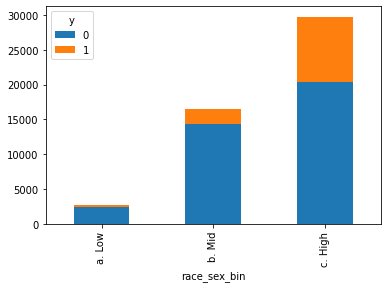

In [ ]:
# Race & Sex Bin Visualization
census_df.pivot_table(index= 'race_sex_bin', columns='y',aggfunc='size').plot.bar(stacked=True)

#Label Encoding the Feature Columns

In [ ]:
census_df.columns

Index(['hours_per_week_bin', 'occupation_bin', 'msr_bin', 'capital_gl_bin',
       'race_sex_bin', 'education_num_bin', 'education_bin', 'workclass_bin',
       'age_bin', 'flag', 'y'],
      dtype='object')

In [ ]:
#Change feature columns into a categorical variable
for col in ['hours_per_week_bin','occupation_bin','msr_bin', 'capital_gl_bin',
       'race_sex_bin', 'education_num_bin', 'education_bin', 'workclass_bin',
       'age_bin']:
    census_df[col] = census_df[col].astype('category')

census_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   hours_per_week_bin  48842 non-null  category
 1   occupation_bin      48842 non-null  category
 2   msr_bin             48842 non-null  category
 3   capital_gl_bin      48842 non-null  category
 4   race_sex_bin        48842 non-null  category
 5   education_num_bin   48842 non-null  category
 6   education_bin       48842 non-null  category
 7   workclass_bin       48842 non-null  category
 8   age_bin             48842 non-null  category
 9   flag                48842 non-null  object  
 10  y                   48842 non-null  int64   
dtypes: category(9), int64(1), object(1)
memory usage: 1.2+ MB


In [ ]:
census_df[['hours_per_week_bin','occupation_bin','msr_bin', 'capital_gl_bin',
       'race_sex_bin', 'education_num_bin', 'education_bin', 'workclass_bin',
       'age_bin']] = census_df[['hours_per_week_bin','occupation_bin','msr_bin', 'capital_gl_bin',
       'race_sex_bin', 'education_num_bin', 'education_bin', 'workclass_bin',
       'age_bin']].apply(LabelEncoder().fit_transform)
census_df

hours_per_week_bin  occupation_bin  msr_bin  ...  age_bin   flag  y
0                       1               1        1  ...        3  train  0
1                       0               4        2  ...        4  train  0
2                       1               0        1  ...        3  train  0
3                       1               0        2  ...        4  train  0
4                       1               4        2  ...        1  train  0
...                   ...             ...      ...  ...      ...    ... ..
48837                   1               4        1  ...        3   test  0
48838                   1               1        0  ...        2   test  0
48839                   3               4        2  ...        3   test  0
48840                   1               1        0  ...        4   test  0
48841                   4               4        2  ...        2   test  1

[48842 rows x 11 columns]

#Split Data into Train & Test Data

In [ ]:
##Create Train & Test Dataframes

#Split original csv file into training and testing data based on the flag column
train_df = census_df.loc[census_df.flag == 'train']
test_df = census_df.loc[census_df.flag == 'test']

#Observe the training data and testing data
train_df.head()
test_df.head()

hours_per_week_bin  occupation_bin  msr_bin  ...  age_bin  flag  y
32561                   1               1        0  ...        0  test  0
32562                   3               1        2  ...        3  test  0
32563                   1               3        2  ...        1  test  1
32564                   1               1        2  ...        4  test  1
32565                   0               1        0  ...        0  test  0

[5 rows x 11 columns]

In [ ]:
#Remove flag column from test and train dataframes now that they have been separated
train_df.drop(columns='flag', inplace=True)
test_df.drop(columns='flag', inplace=True)

#Observe the training data and testing data
train_df.head()
test_df.head()

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


hours_per_week_bin  occupation_bin  msr_bin  ...  workclass_bin  age_bin  y
32561                   1               1        0  ...              1        0  0
32562                   3               1        2  ...              1        3  0
32563                   1               3        2  ...              1        1  1
32564                   1               1        2  ...              1        4  1
32565                   0               1        0  ...              0        0  0

[5 rows x 10 columns]

In [ ]:
#Split training data into attributes and labels
y_train = train_df['y']
x_train = train_df.drop('y', axis=1)

In [70]:
y_train.count()

32561

In [69]:
y_train.value_counts()

0    24720
1     7841
Name: y, dtype: int64

In [ ]:
#Split testing data into attributes and labels
y_test = test_df['y']
x_test = test_df.drop('y', axis=1)

x_test

hours_per_week_bin  occupation_bin  ...  workclass_bin  age_bin
32561                   1               1  ...              1        0
32562                   3               1  ...              1        3
32563                   1               3  ...              1        1
32564                   1               1  ...              1        4
32565                   0               1  ...              0        0
...                   ...             ...  ...            ...      ...
48837                   1               4  ...              1        3
48838                   1               1  ...              0        2
48839                   3               4  ...              1        3
48840                   1               1  ...              1        4
48841                   4               4  ...              1        2

[16281 rows x 9 columns]

#Decision Tree Classifier Model

In [ ]:
#Set detree classifier to train the model and then predict y_test
dtree = DecisionTreeClassifier(min_samples_split=2, max_depth=3, min_samples_leaf=5, random_state=80,max_features=None,criterion='entropy')

#Train the model using training data
dtree.fit(x_train, y_train)

#Predict using the test data
y_pred = dtree.predict(x_test)

##Decision Tree Model Visualization

In [ ]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus


/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


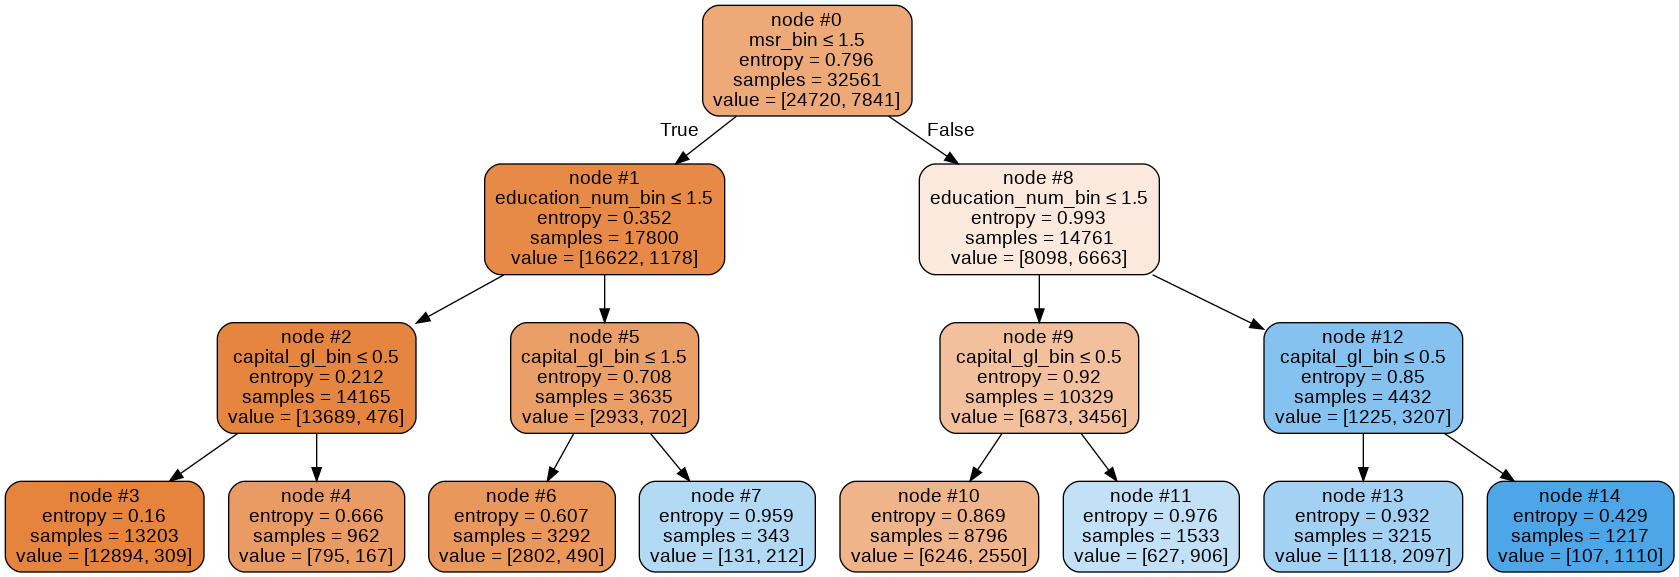

In [ ]:
#Display decision tree
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
                node_ids=True, feature_names=x_train.columns)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

##Decision Tree Model Evaluation

In [ ]:
#Import metrics to run evaluation of decision tree model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8328112523800749


Confusion Matrix:
[[11456   979]
 [ 1743  2103]]


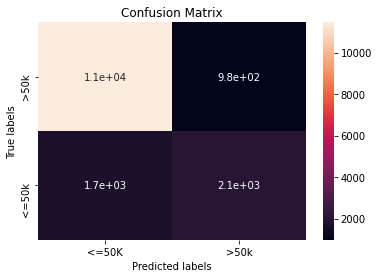

In [ ]:
print("Confusion Matrix:")
cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)

import seaborn as sns
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['<=50K', '>50k']); ax.yaxis.set_ticklabels(['>50k', '<=50k']);

In [ ]:
print("Classification Report:")
print(metrics.classification_report(y_test, y_pred))



Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.92      0.89     12435
           1       0.68      0.55      0.61      3846

    accuracy                           0.83     16281
   macro avg       0.78      0.73      0.75     16281
weighted avg       0.82      0.83      0.83     16281



Precision - proportion of positive identifications that were actually correct

Recall (TPR-true positive rate) - proportion of actual positives identified correctly

F1 Score - measure of the test's accuracy - the harmonic mean of precision and recall. The measure of the preciseness and robustness of your model
(score between 1=perfect precision & recall and 0)

In [ ]:
from sklearn.metrics import roc_auc_score, plot_roc_curve, RocCurveDisplay 
print("AUC Value:",roc_auc_score(y_test,y_pred))

AUC Value: 0.7340362396160501


ROC Curve:


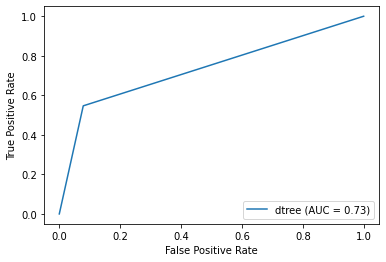

In [ ]:
print("ROC Curve:")
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
 
roc_auc = roc_auc_score(y_test, y_pred)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name="dtree")
display.plot()

##Decision Tree Model Tuning

**Four Hyperparameters to vary:**
1. **Split Criteria** – ‘Entropy’ or ‘Gini Impurity’
2. **Minimum Sample Split** – Minimum number of records required in any node for a further split to be attempted
3. **Minimum Sample Leaf** – Minimum of samples in a leaf node to stop further splitting (becomes a leaf node)
4. **Maximum Depth** – Maximum depth of the tree allowed


In [64]:
###CODE USED TO RUN DIFFERENT HYPERPARAMETERS 

#Set detree classifier to train the model and then predict y_test
dtree_test = DecisionTreeClassifier(min_samples_split=5, min_samples_leaf=15, max_depth=8,random_state=80,max_features=None,criterion='entropy')

#Train the model using training data
dtree_test.fit(x_train, y_train)

#Predict using the test data
y_pred1 = dtree_test.predict(x_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred1))

print("Classification Report:")
print(metrics.classification_report(y_test, y_pred1))

print(metrics.recall_score(y_test,y_pred1))
print(metrics.precision_score(y_test,y_pred1))
print(metrics.f1_score(y_test,y_pred1))


print("AUC Value:",roc_auc_score(y_test,y_pred1))

Accuracy: 0.8455868804127511
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.93      0.90     12435
           1       0.71      0.58      0.64      3846

    accuracy                           0.85     16281
   macro avg       0.80      0.75      0.77     16281
weighted avg       0.84      0.85      0.84     16281

0.5785231409256371
0.7135984605516357
0.6390005743825388
AUC Value: 0.7533548555452472


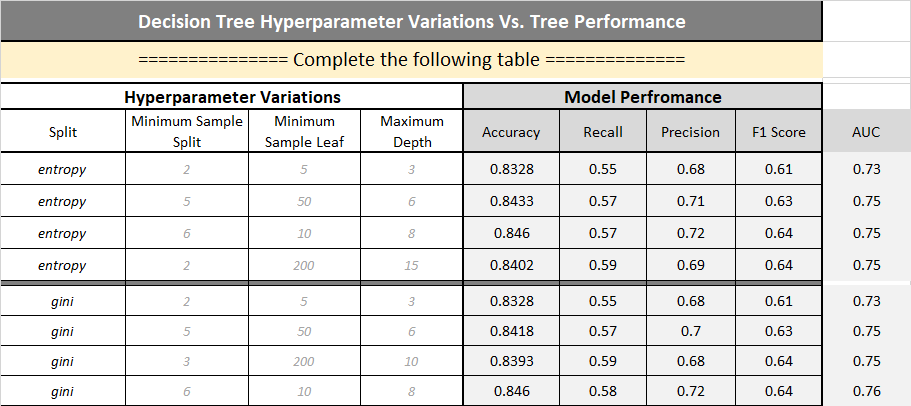

##Best Model

In [65]:
#Set detree classifier to train the model and then predict y_test
dtree_best = DecisionTreeClassifier(max_depth=8, min_samples_leaf=10, random_state=80,max_features=None,criterion='gini',min_samples_split=6)

#Train the model using training data
dtree_best.fit(x_train, y_train)

#Predict using the test data
y_pred_best = dtree_best.predict(x_test)

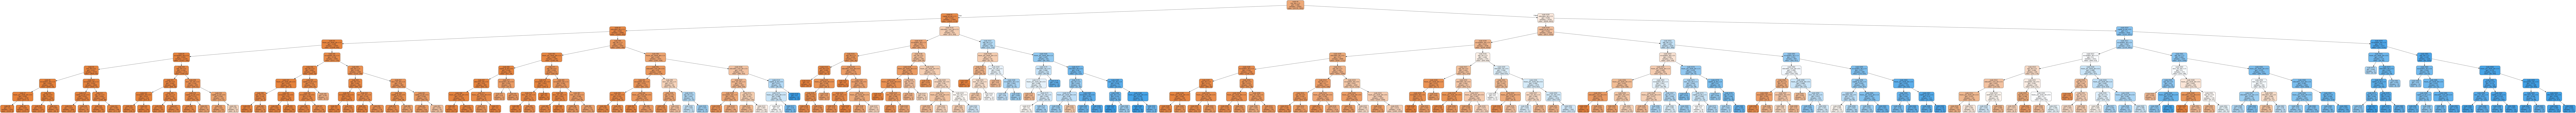

In [66]:
#Display BEST decision tree
dot_data = StringIO()
export_graphviz(dtree_best, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
                node_ids=True, feature_names=x_train.columns)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

#Automation of Performance Tuning


In [ ]:
auto_df.columns

Index(['Split ', 'Min_Sample_Split', 'Min_ Sample_Leaf', 'Max_Depth',
       'Accuracy', 'Recall', 'Precision', 'F1_Score'],
      dtype='object')

In [ ]:
accuracy_list = []
recall_list = []
precision_list = []
f1_list = []

for row in range(8):
  auto_slice = auto_df.iloc[0,0:4]
  for item in auto_df:
    item_slice = auto_df.iloc[0,0]
    item_slice_2 = auto_df.iloc[0,1]
    item_slice_3 = auto_df.iloc[0,2]
    item_slice_4 = auto_df.iloc[0,3]
    
    dtree = DecisionTreeClassifier(min_samples_split=item_slice_2, min_samples_leaf=item_slice_3, 
                                   max_depth=item_slice_4, random_state=101, max_features=None, criterion=item_slice)
 
    dtree.fit(x_train, y_train)
    y_pred = dtree.predict(x_test)
    
    accuracy_sc = accuracy_score(y_test, y_pred)
    recall_sc = metrics.recall_score(y_test, y_pred)
    precision_sc = metrics.precision_score(y_test, y_pred)
    f1_sc = metrics.f1_score(y_test, y_pred)
 
  accuracy_list.append(accuracy_sc)
  recall_list.append(recall_sc)
  precision_list.append(precision_sc)
  f1_list.append(f1_sc)
 
auto_df.loc[auto_df.Accuracy.isnull(), 'Accuracy'] = accuracy_list
auto_df.loc[auto_df.Recall.isnull(), 'Recall'] = recall_list
auto_df.loc[auto_df.Precision.isnull(), 'Precision'] = precision_list
auto_df.loc[auto_df.F1_Score.isnull(), 'F1_Score'] = f1_list

In [ ]:
auto_df

Split   Min_Sample_Split  Min_ Sample_Leaf  ...    Recall  Precision  F1_Score
0  entropy                 2                 5  ...  0.546802   0.682349  0.607102
1  entropy                 5                50  ...  0.546802   0.682349  0.607102
2  entropy                 3               100  ...  0.546802   0.682349  0.607102
3  entropy                 2               200  ...  0.546802   0.682349  0.607102
4     gini                 2                 5  ...  0.546802   0.682349  0.607102
5     gini                 5                50  ...  0.546802   0.682349  0.607102
6     gini                 3               200  ...  0.546802   0.682349  0.607102
7     gini                 2               200  ...  0.546802   0.682349  0.607102

[8 rows x 8 columns]

#Prediction Using Trained Model